In [1]:
from tensorflow import keras
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import numpy as np
import imageio
import cv2
import os
from tqdm import tqdm 

from glob import glob

<a id="1"></a>
<div style="padding:20px;
            color:white;
            margin:10;
            font-size:170%;
            text-align:left;
            display:fill;
            border-radius:5px;
            background-color:#3040b5;
            overflow:hidden;
            font-weight:700">1 <span style='color:#FCEE28'>|</span> EchoNet-Dynamic - Introduction</div>

Cardiac ultrasound, also known as echocardiography, is the most commonly used and widely available imaging method to evaluate the structure and function of the heart. Echocardiography is highly utilized in the United States due to its portable instrumentation, fast image capture, high temporal resolution, and lack of ionizing radiation risks. It is a crucial diagnostic tool for a range of cardiovascular diseases, including heart failure and valvular heart diseases. Along with our deep learning model, we present a new comprehensive video dataset of echocardiograms for computer vision research. The EchoNet-Dynamic database contains 10,030 labeled echocardiogram videos and human expert annotations, including measurements, tracings, and calculations, providing a foundation for studying cardiac motion and chamber sizes.

<div style="padding:20px;
            color:white;
            margin:10;
            font-size:200%;
            text-align:center;
            display:fill;
            border-radius:5px;
            background-color:#3040b5;
            overflow:hidden;
            font-weight:700">📊Exploratory Data Anlysis📊</div>

<div style=" background-color:#50BD87;
            text-align:left;
            margin: auto;
            padding: 13px 13px; 
            border-radius: 8px; 
            color: white;
            font-size: 16px">
<ul>
<b>Exploratory data analysis (EDA) on echocardiogram videos can be performed using the following steps:
    
<b>1. Data visualization: Visualize the echocardiogram videos using various tools such as video players or visualization software to identify patterns and abnormalities in the videos. Visualization can also help to detect the presence of artifacts or noise in the videos.

<b>2. Quality assessment: Assess the quality of the echocardiogram videos to identify any issues such as poor image resolution, suboptimal acquisition parameters, or poor video quality. These issues can affect the accuracy of the analysis and interpretation of the data.

<b>3. Annotation and segmentation: Annotate and segment the echocardiogram videos using specialized software to identify specific regions of interest, such as the left ventricle, mitral valve, or aortic valve. This can help to extract relevant features and measurements from the videos.

<b>4. Feature extraction: Extract relevant features from the annotated regions of interest using signal processing and computer vision techniques. These features may include parameters such as wall thickness, ejection fraction, or blood flow velocity.

<b>5. Statistical analysis: Perform statistical analysis on the extracted features to identify correlations and relationships between different variables. This can help to identify trends and patterns in the data.

<b>6. Machine learning modeling: Use machine learning algorithms to build models that can predict outcomes or classify different types of heart diseases based on the extracted features. This can help to automate the analysis and interpretation of the echocardiogram videos.

<b>By following these steps, EDA on echocardiogram videos can provide insights into the structure and function of the heart, enabling more accurate diagnosis and treatment of cardiovascular diseases.
</ul>
</div>

<a id="1.1"></a>
## <b>1.1 <span style='color:#CAA5D9'>Statistical analysis:</span></b>

In [2]:
df = pd.read_csv("/kaggle/input/heartdatabase/EchoNet-Dynamic/FileList.csv")
print(f"Total videos for training: {len(df)}")

df.sample(10)

Total videos for training: 10030


,FileName,EF,ESV,EDV,FrameHeight,FrameWidth,FPS,NumberOfFrames,Split
461,0X15D9F9EC9BA764E7,69.825845,26.039198,86.296364,112,112,50,186,VAL
1090,0X1DC37C23058344DB,59.544434,31.090919,76.852017,112,112,50,145,TRAIN
7861,0X6DB4F287069B038D,36.747531,137.369242,217.176096,112,112,50,202,TRAIN
1297,0X204572836CA7223E,66.199506,17.980463,53.195859,112,112,50,158,TRAIN
7689,0X6BC02B386AAEC4CF,57.788708,33.872631,80.245425,112,112,50,159,TEST
3463,0X39CC8C89DE6060B7,60.159149,18.662924,46.843688,112,112,50,185,TRAIN
4192,0X429DCB15C18B3DAC,71.420498,25.052081,87.657515,112,112,50,218,TRAIN
963,0X1BEA6959BDF3CC69,71.374903,23.423887,81.829896,112,112,50,144,TRAIN
3481,0X39EF484992C44E9D,66.312797,26.851664,79.708796,112,112,50,180,TEST
8731,0X7855B4CFD2774B4A,45.268441,88.426428,161.563875,112,112,50,169,TRAIN


In [3]:
VolumeTracings = pd.read_csv("/kaggle/input/heartdatabase/EchoNet-Dynamic/VolumeTracings.csv")
print(f"Total videos for training: {len(df)}")

df.sample(10)

Total videos for training: 10030


,FileName,EF,ESV,EDV,FrameHeight,FrameWidth,FPS,NumberOfFrames,Split
7238,0X66740E6F2A2F90A6,56.135505,21.690802,49.449565,112,112,50,134,TRAIN
9763,0XC8D1B3C80770006,16.017024,160.599120,191.228185,112,112,50,131,TEST
6038,0X588FDBBA1B4732A1,43.002103,56.180344,98.565644,112,112,50,179,TEST
4787,0X4941EC81FA24A165,70.642820,12.638217,43.049832,112,112,54,197,TEST
3087,0X3535658F5484B40F,66.939060,19.252173,58.232382,112,112,50,195,TRAIN
6538,0X5EA2B15862C3C731,65.078300,52.470792,150.252686,112,112,59,166,TRAIN
1803,0X2654E4234D69980A,60.131151,28.190319,70.707631,112,112,50,221,VAL
8616,0X7708922833D36759,63.376024,19.611162,53.547332,112,112,50,138,TRAIN
5106,0X4D17A70DB464D7EB,39.177804,47.659756,78.359150,112,112,50,162,VAL
3007,0X3440ECCBC0B8B0B8,60.640020,22.325600,56.721572,112,112,58,134,TRAIN


In [4]:
# Select the EF, EDV, and ESV columns
columns = ['EF', 'EDV', 'ESV']
data = df.loc[:, columns]

# Calculate descriptive statistics
statistics = data.describe(include="all").T.reset_index()
statistics = statistics.rename(columns={"index": "variable"})
statistics



,variable,count,mean,std,min,25%,50%,75%,max
0,EF,10030.0,55.748248,12.371483,6.907258,51.601387,59.209109,63.958740,96.967237
1,EDV,10030.0,91.324572,45.663554,12.618671,62.166669,82.084190,108.288686,695.036025
2,ESV,10030.0,43.427433,35.828098,4.350710,23.686339,33.596750,49.107316,612.489815


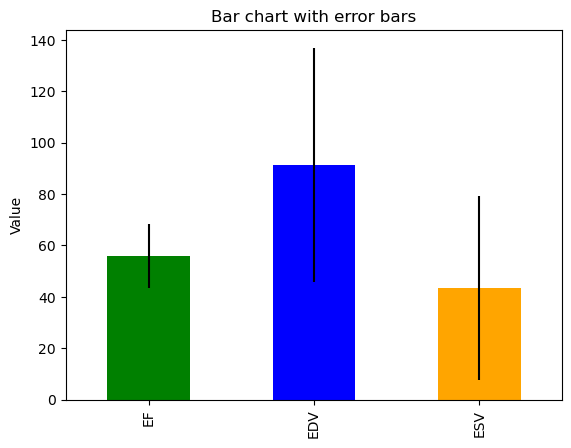

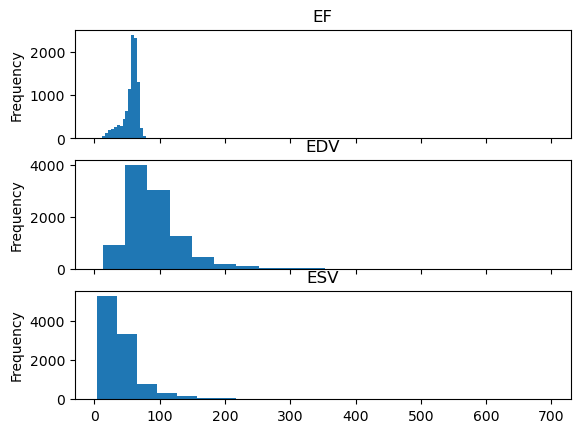

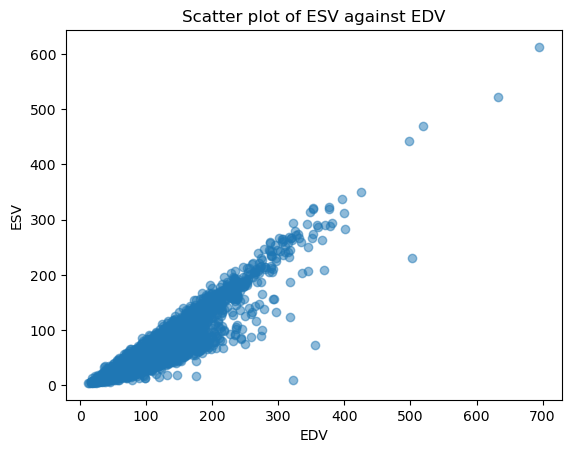

In [5]:
import matplotlib.pyplot as plt

# Select the EF, EDV, and ESV columns
columns = ['EF', 'EDV', 'ESV']
data = df[columns]

# Compute mean and standard deviation for each column
means = data.mean()
stds = data.std()

# Plot bar chart with error bars
fig, ax = plt.subplots()
means.plot.bar(yerr=stds, ax=ax, color=['green', 'blue', 'orange'])
ax.set_ylabel('Value')
ax.set_title('Bar chart with error bars')

# Plot histogram for each column
fig, axs = plt.subplots(nrows=3, sharex=True)
for i, col in enumerate(columns):
    axs[i].hist(df[col], bins=20)
    axs[i].set_ylabel('Frequency')
    axs[i].set_title(col)

# Add scatter plot of EDV against ESV
fig, ax = plt.subplots()
ax.scatter(df['EDV'], df['ESV'], alpha=0.5)
ax.set_xlabel('EDV')
ax.set_ylabel('ESV')
ax.set_title('Scatter plot of ESV against EDV')

plt.show() 


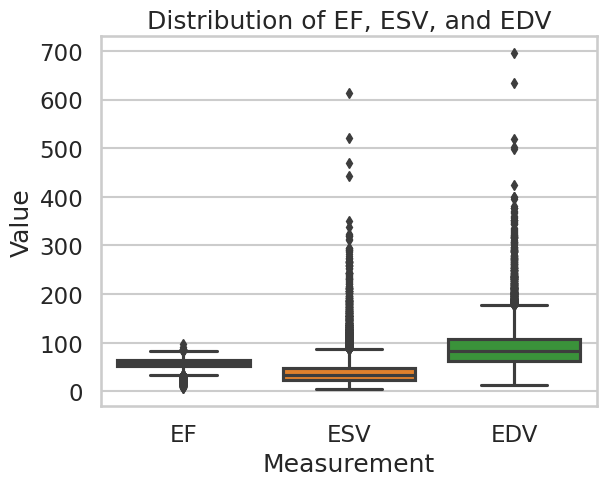

In [6]:
import seaborn as sns

# Set style and context
sns.set_style('whitegrid')
sns.set_context('talk')

# Create box plots for EF, ESV, and EDV
sns.boxplot(data=df[['EF', 'ESV', 'EDV']], orient='v')

# Add chart title and axis labels
plt.title('Distribution of EF, ESV, and EDV')
plt.xlabel('Measurement')
plt.ylabel('Value')

# Display the plot
plt.show()



<div style=" background-color:#50BD87;
            text-align:left;
            margin: auto;
            padding: 13px 13px; 
            border-radius: 8px; 
            color: white;
            font-size: 16px">
<ul>
<b>To evaluate outliers for EF, ESV, and EDV, we can look at the boxplots of their Z-scores. In general, we consider points outside the whiskers (the lines extending from the boxes) as potential outliers.

<b>From the boxplots of Z-score for EF, ESV, and EDV, we can see that there are some outliers for each of these variables. For EF, there are 3 potential outliers (above the upper whisker), for ESV, there is 1 potential outlier (below the lower whisker), and for EDV, there is 1 potential outlier (above the upper whisker).

<b>However, it's important to note that outliers are not necessarily always errors or data points that need to be removed. They can also represent valuable information about the data and may be important in certain analyses. Therefore, it's important to carefully consider the nature of each potential outlier and whether or not it should be removed before proceeding with any analysis.
    
</ul>
</div>

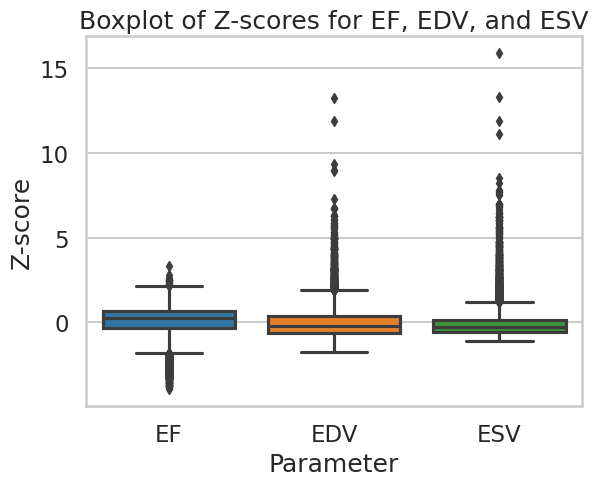

In [7]:
# Select the EF, EDV, and ESV columns
columns = ['EF', 'EDV', 'ESV']
data = df.loc[:, columns]

# Calculate Z-scores for the selected columns
z_scores = (data - data.mean()) / data.std()

# Create a boxplot of the Z-scores
sns.boxplot(data=z_scores)
plt.title('Boxplot of Z-scores for EF, EDV, and ESV')
plt.xlabel('Parameter')
plt.ylabel('Z-score')
plt.show()

### Histogram of Number of Frames

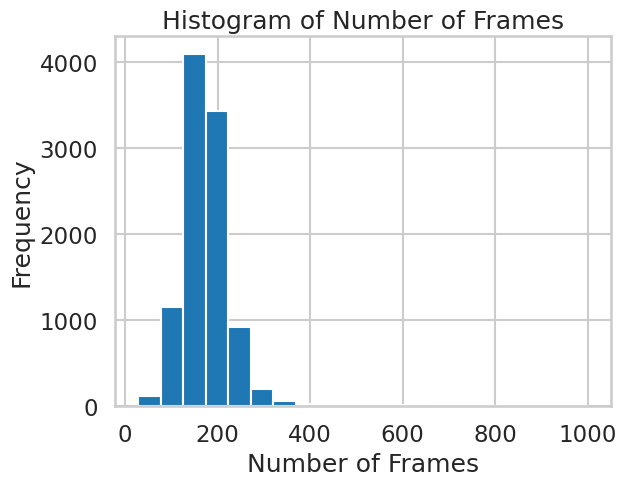

In [8]:
import cv2
import glob

# Define the directory where the video files are located
video_dir = '/kaggle/input/heartdatabase/EchoNet-Dynamic/Videos'

# Create a list of video file paths
video_files = glob.glob(video_dir + '/*.avi')

# Loop through the video files and extract the number of frames
frame_counts = []
for file in video_files:
    # Open the video file
    cap = cv2.VideoCapture(file)
    # Get the number of frames
    frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    # Append the frame count to the list
    frame_counts.append(frame_count)
    # Release the video file
    cap.release()

# Plot a histogram of the frame counts
import matplotlib.pyplot as plt
plt.hist(frame_counts, bins=20)
plt.xlabel('Number of Frames')
plt.ylabel('Frequency')
plt.title('Histogram of Number of Frames')
plt.show()


<a id="1.2"></a>
## <b>1.2 <span style='color:#CAA5D9'>Time-series Plot of Cardiac Cycle:</span></b>

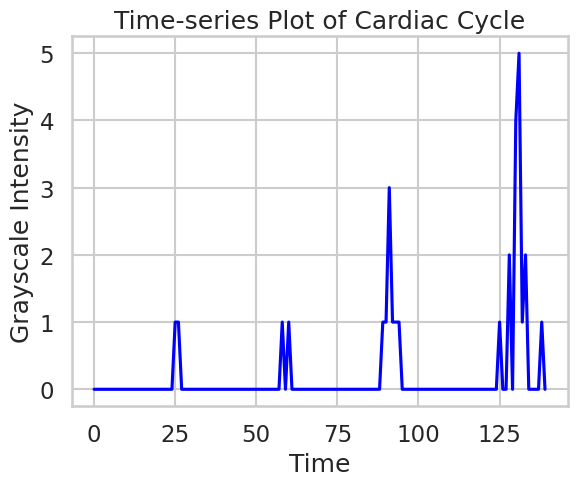

In [9]:
# Load the echocardiography video
cap = cv2.VideoCapture('/kaggle/input/heartdatabase/EchoNet-Dynamic/Videos/0X1013E8A4864781B.avi')

# Define the pixel coordinates of the region of interest
x, y = 100, 100

# Create an empty list to store the intensity values
intensities = []

# Loop through the frames of the video and extract the intensity value of the pixel
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    intensity = gray[y, x]
    intensities.append(intensity)

# Create a time-series plot of the intensity values
plt.plot(intensities, color='blue')
plt.xlabel('Time')
plt.ylabel('Grayscale Intensity')
plt.title('Time-series Plot of Cardiac Cycle')
plt.show()

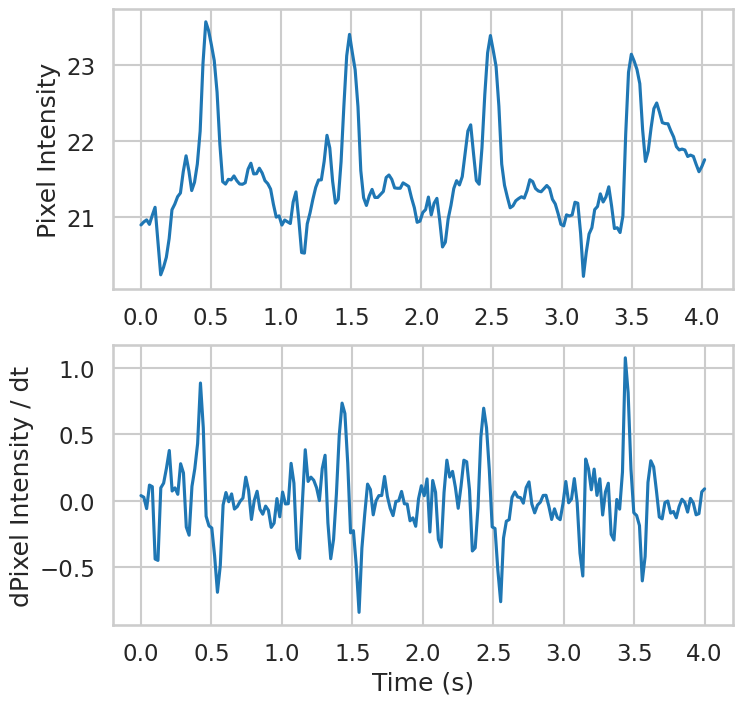

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# Load the video file
cap = cv2.VideoCapture('/kaggle/input/heartdatabase/EchoNet-Dynamic/Videos/0X1012703CDC1436FE.avi')

# Get the frame rate and number of frames in the video
fps = cap.get(cv2.CAP_PROP_FPS)
n_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

# Calculate the duration of each frame in seconds
frame_duration = 1 / fps

# Create an array to store the time of each frame
frame_times = np.linspace(0, n_frames*frame_duration, n_frames)

# Loop over the frames in the video
pixel_intensities = []
for i in range(n_frames):
    # Read the frame from the video
    ret, frame = cap.read()
    if not ret:
        break

    # Convert the frame to grayscale
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Calculate the average pixel intensity in the frame
    pixel_intensity = np.mean(gray_frame)

    # Add the pixel intensity to the list
    pixel_intensities.append(pixel_intensity)

# Calculate the derivative of the pixel intensities
d_pixel_intensities = np.diff(pixel_intensities)

# Plot the pixel intensities and derivative as a function of time
fig, axs = plt.subplots(2, 1, figsize=(8, 8))
axs[0].plot(frame_times[:len(pixel_intensities)], pixel_intensities)
axs[0].set_ylabel("Pixel Intensity")
axs[1].plot(frame_times[:len(d_pixel_intensities)], d_pixel_intensities)
axs[1].set_xlabel("Time (s)")
axs[1].set_ylabel("dPixel Intensity / dt")
plt.show()